Today I will be doing <b>Exploratory Data Analysis (EDA)</b> on The Windows Store dataset by @Vishnu.

I love Docker to keep everything compartmentalize and neat. Plus, it also ensures you that you can also easily shift (and scale) your system to any of your favorite cloud provider like AWS, Azure, Google Cloud etc. If you don't know what Docker is then I highly suggest you to check out this link

https://www.zdnet.com/article/what-is-docker-and-why-is-it-so-darn-popular/

For meeting my relational database needs, I am choosing an official docker image of SQL Server 2019 version. One free tip for you guys: 

if you are doing anything with your containers which you would have to access later, don't forget to use persistant storage. And please use volumes, not bind mounts (Will explain this in some future article).

For setting up my Python IDE, I downloaded an official docker image of Jupyter notebook (not the Jupyter lab), which was super easy to setup. Just don't forget to enable port forwarding between the container and the host on 8888. I first thought of building my own python notebook docker image from scratch but then I procastinated it till the near future. Here's the link to that image:

https://hub.docker.com/r/jupyter/minimal-notebook

For those who have just entered the Docker realm, it's dangerous to go alone. Take these docker commands! 

* `docker rename <old_container_name> <new_container_name>`

   Self explantory

* `docker cp <host_filepath> <container_filepath>`

   For copying a file located in your local system to a container.

* `docker ps -a`

   Lists all docker containers

* `docker exec -it <container_name> "bash"`

   Opens a bash terminal connected with the forementioned container

* `docker images `

   Lists all images downloaded on the local system. You can use docker images rm <image_id> to do housecleaning.

The dataset contains 6 columns, which are pretty self explanatory, so I won't be explaning them here. They are also mentioned in the dataset's description.

A quick look at the dataset through Excel revealed that the date column contained values in 2 different formats, which had to be fixed before I can import it into SQL Server. Even after using Excel's default data formatting,only values belonging to one particular format got converted into DateTime datatype, and the rest still remained as text strings. Fear not! As by using some clever usage of Excel formulas, this was resolved. 

Basically, by extracting substrings from the values and feeding them individually as date components in the date formula, as I was able to convert the remaining values.

Here's the snippet:

`IF(ISTEXT($E4), DATE( RIGHT($E4,4), MID($E4,4,2), LEFT($E4,2)), $E4)`

The IF condition checks if the value is actually a text or a number (since the column contained both) & RIGHT, MID and LEFT are positional string extraction methods.

Here's the result:


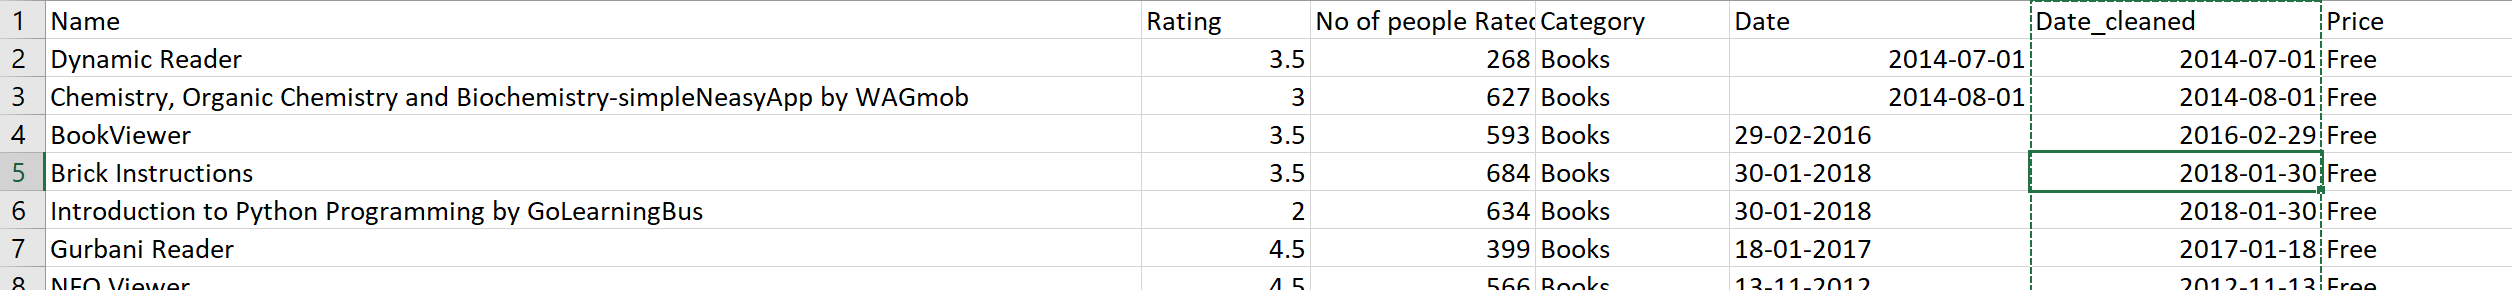

I replaced commas in the values of the NAME column so that it would be much easier to import the whole dataset into the SQL Server, as a CSV file.

The PRICE column consisted mostly of "Free" (which I replaced with 0), and the remaining values were concatenated with the ₹ currency symbol. Apparently, Excel doesn't give us any decent inbuilt method to extract numbers from text, and so, I had to take a more comprehensive approach. Here's the full formula:

`VALUE(RIGHT(F5164, LEN(F5164) - MIN(SEARCH({0,1,2,3,4,5,6,7,8,9}, $F5164&"123456789")) + 1))`

Lets break it down, shall we!

1. `MIN(SEARCH({0,1,2,3,4,5,6,7,8,9}, $F5164&"123456789")`

    I use the SEARCH function to find the location of the first digit in the string. Here, the constant array               {0,1,2,3,4,5,6,7,8,9} defines all the digits I need to search and $F5164&"123456789" is the target cell, concatenated with string "1234567890" to help provide the SEARCH function with a "fake" position for digits which are not there in the target cell.

    Finally, MIN function is used to give the smallest value from the result of the SEARCH function, corrosponding to the location of the first digit in the string.
    
    

2. `RIGHT(F5164, LEN(F5164) - MIN(SEARCH({0,1,2,3,4,5,6,7,8,9}, $F5164&"123456789")) + 1)`

    Here we use RIGHT function, which extracts a given length of substring from a string starting from the right side. The first digit location is subtracted from the total length of the main string to get the total number of digits to be extracted. 1 is added to count for the first digit itself.
    
    

3. `VALUE(RIGHT(............................))`

    Since Excel will return the substring as a text, which i certainly don't want, I used the VALUE function to convert them into numbers.

After the data cleaning was done, I was ready to upload the data to the SQL server. I used the BULK INSERT function to import my CSV into a already made, nice and juicy SQL table. Here's the full syntax:

`bulk insert into WINDOWS_STORE from "/datasets/msft.csv" with(firstrow = 2, type = "csv")`

FIRSTROW parameter is used to tell the function to ignore the header row when importing.

One thing, which I ignored in my early data cleaning shenanigans and caused me a lot of distress while I tried to figure out why my SQL syntax was not working, was quite a few records contained names with special characters, which the VARCHAR datatype doesn't support. I had to alter my table's NAME column to have NVARCHAR as its datatype. This solved the problem.

So this is it for now. To conclude, I was able to setup a local containerized development environment on my laptop, cleaned my data and, imported it to my local SQL server instance.

In my next article, I will start with the fun part: <b>Exploring and Visualizing</b>.